In [22]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold, train_test_split
import numpy as np
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
from itable import PrettyTable, TableStyle, CellStyle
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour, EditedNearestNeighbours, RepeatedEditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalanceCascade, EasyEnsemble

In [25]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)
pylab.style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


### Generate data with classes

In [32]:
X, y = make_classification(class_sep=1.2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, 
                           n_features=5, n_clusters_per_class=1, n_samples=10000, flip_y=0, random_state=10)
pca = PCA(n_components=2)
X = pca.fit_transform(X)
y = y.astype('str')
y[y=='1'] = 'L'
y[y =='0'] = 'S'
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
X_1, X_2 = X_train[y_train=='S'], X_train[y_train=='L']

Text(0.5,1,'Orginal DataSet..')

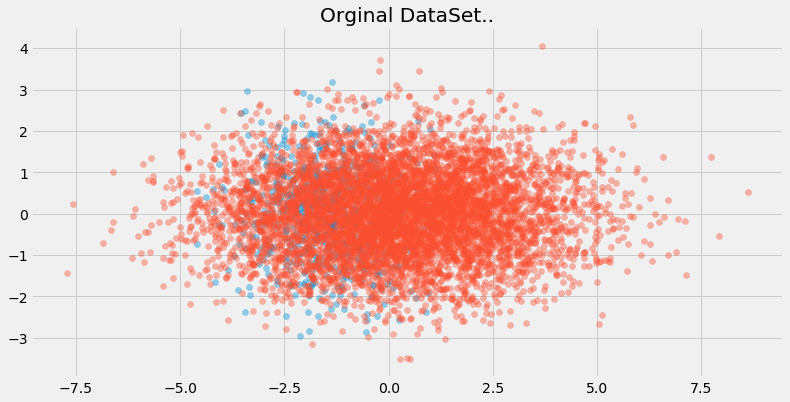

In [37]:
plt.scatter(X_1[:,0], X_1[:, 1], alpha=0.4)
plt.scatter(X_2[:,0], X_2[:, 1], alpha=0.4)
plt.title('Orginal DataSet..')

### Fitting a Logistic Regression

In [57]:
clf_base = LogisticRegression()
grid = {'C':10.0 * np.arange(1,3),
        'penalty':['l1', 'l2']}
cv = KFold(X_train.shape[0], n_folds=5, shuffle=True, random_state=0)
clf = GridSearchCV(clf_base, grid, cv = cv, n_jobs=8, scoring='f1_macro')

In [64]:
clf.fit(X_train, y_train)
coef = clf.best_estimator_.coef_
intercept = clf.best_estimator_.intercept_
x1 = np.linspace(-5, 5, 100)
x2 = -(coef[0][0]*x1+intercept[0])/coef[0][0]

Text(0.5,1,'Orginal DataSet.. Fitted Logistic Regression')

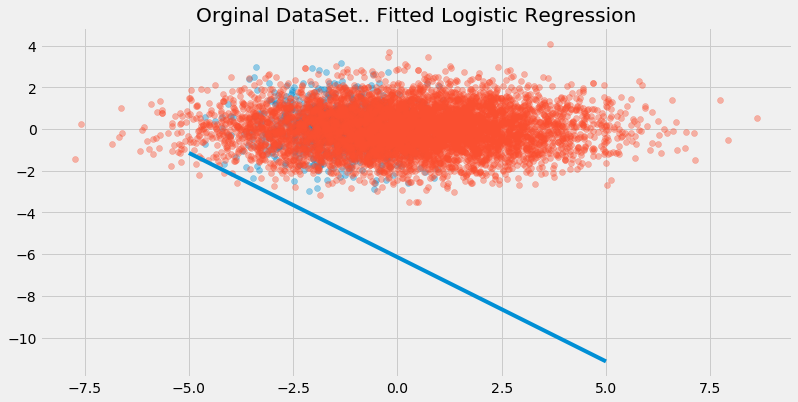

In [65]:
plt.scatter(X_1[:,0], X_1[:, 1], alpha=0.4)
plt.scatter(X_2[:,0], X_2[:, 1], alpha=0.4)
plt.plot(x1, x2)
plt.title('Orginal DataSet.. Fitted Logistic Regression')

In [72]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          L       0.89      1.00      0.94      2679
          S       0.00      0.00      0.00       321

avg / total       0.80      0.89      0.84      3000



### Assymetric Loss Function

In [74]:
clf_base = LogisticRegression()
grid = {'C':10.0 * np.arange(1,3),
        'penalty':['l1', 'l2'],
         'class_weight':['balanced']}
cv = KFold(X_train.shape[0], n_folds=5, shuffle=True, random_state=0)
clf = GridSearchCV(clf_base, grid, cv = cv, n_jobs=8, scoring='f1_macro')

In [75]:
clf.fit(X_train, y_train)
coef = clf.best_estimator_.coef_
intercept = clf.best_estimator_.intercept_
x1 = np.linspace(-5, 5, 100)
x2 = -(coef[0][0]*x1+intercept[0])/coef[0][0]

Text(0.5,1,'Orginal DataSet.. Fitted Logistic Regression')

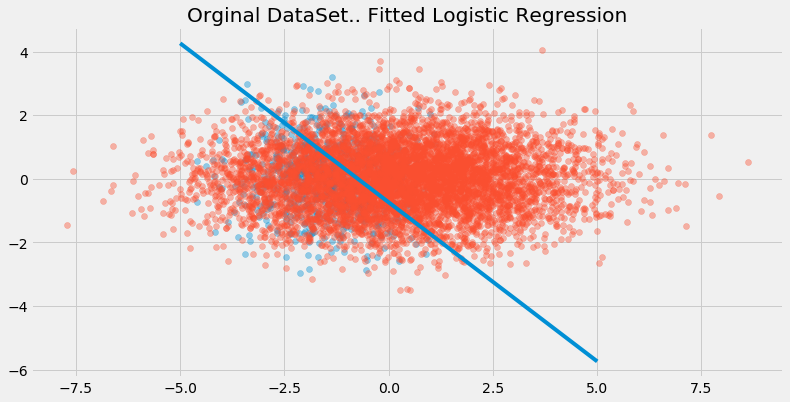

In [76]:
plt.scatter(X_1[:,0], X_1[:, 1], alpha=0.4)
plt.scatter(X_2[:,0], X_2[:, 1], alpha=0.4)
plt.plot(x1, x2)
plt.title('Orginal DataSet.. Fitted Logistic Regression')

In [77]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          L       0.96      0.67      0.79      2679
          S       0.22      0.77      0.34       321

avg / total       0.88      0.68      0.74      3000



#### we impoved precision on majority class and recall on minority class

### Under Sampling Techniques(I am not bothered for now)
1. RandomUnder sampling
2. Near Miss 1
3. Near Miss 2
4. Near Miss 3
5. Condensed Nearest Neightbour
6. Edited Nearest Neighbor
7. TOMEK LINK Removal

## Over Sampling 

#### Random oversampling

1. Random Oversampling of minority class
2. May lead to overfitting(because you are counting same example again and again)

In [104]:
os = RandomOverSampler(ratio = 0.5, random_state=1)
X_train_res, y_train_res = os.fit_sample(X_train, y_train)
print("Distribution of class labels before resampling {}".format(Counter(y_train)))
print("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({'L': 6321, 'S': 679})
Distribution of class labels after resampling Counter({'L': 6321, 'S': 3160})


In [105]:
clf_base = LogisticRegression()
grid = {'C':10.0 * np.arange(1,3),
        'penalty':['l1', 'l2']}
cv = KFold(X_train.shape[0], n_folds=5, shuffle=True, random_state=0)
clf = GridSearchCV(clf_base, grid, cv = cv, n_jobs=8, scoring='f1_macro')

In [106]:
clf.fit(X_train_res, y_train_res)
coef = clf.best_estimator_.coef_
intercept = clf.best_estimator_.intercept_
x1 = np.linspace(-5, 5, 100)
x2 = -(coef[0][0]*x1+intercept[0])/coef[0][0]

In [107]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          L       0.91      0.84      0.87      2679
          S       0.17      0.28      0.21       321

avg / total       0.83      0.78      0.80      3000



Text(0.5,1,'Orginal DataSet.. Fitted Logistic Regression Random Over Sampling')

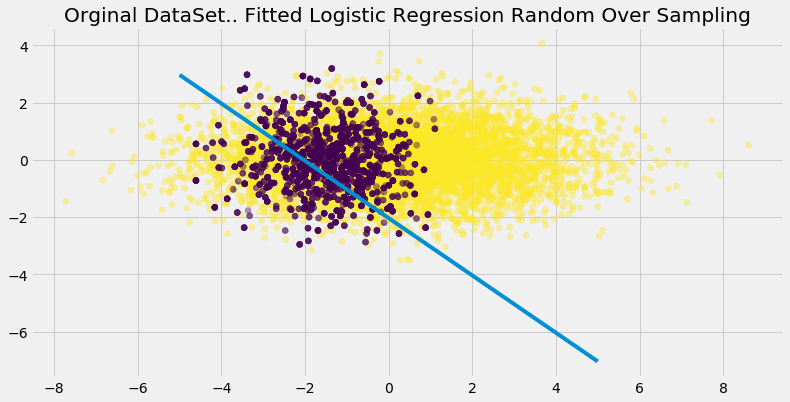

In [108]:
plt.scatter(X_train_res[:,0], X_train_res[:, 1], c = y_train_res[:]=='L', alpha=0.4)
plt.plot(x1, x2)
plt.title('Orginal DataSet.. Fitted Logistic Regression Random Over Sampling')

### SMOTE (Synthetic  Minority oversampling Technique)

There are lot of variants of SMOTE (use can explore it)<br>
```
  for each point p  in S:
        . Compute its nearest neightbours in S
        . Randomly choose r <= k of the neighbours (with replacement)
        . Choose a random point along each of the lines joining P and each of the r neighbours
        . Add these synthetic points to the dataset with class S
```

In [109]:
os = SMOTE(ratio = 0.5, random_state = 1, k_neighbors = 5)
X_train_res, y_train_res = os.fit_sample(X_train, y_train)
print("Distribution of class labels before resampling {}".format(Counter(y_train)))
print("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({'L': 6321, 'S': 679})
Distribution of class labels after resampling Counter({'L': 6321, 'S': 3160})


In [110]:
clf_base = LogisticRegression()
grid = {'C':10.0 * np.arange(1,3),
        'penalty':['l1', 'l2']}
cv = KFold(X_train.shape[0], n_folds=5, shuffle=True, random_state=0)
clf = GridSearchCV(clf_base, grid, cv = cv, n_jobs=8, scoring='f1_macro')
clf.fit(X_train_res, y_train_res)
coef = clf.best_estimator_.coef_
intercept = clf.best_estimator_.intercept_
x1 = np.linspace(-5, 5, 100)
x2 = -(coef[0][0]*x1+intercept[0])/coef[0][0]

In [111]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          L       0.91      0.84      0.87      2679
          S       0.17      0.27      0.21       321

avg / total       0.83      0.78      0.80      3000



Text(0.5,1,'Orginal DataSet.. Fitted Logistic Regression SMOTE')

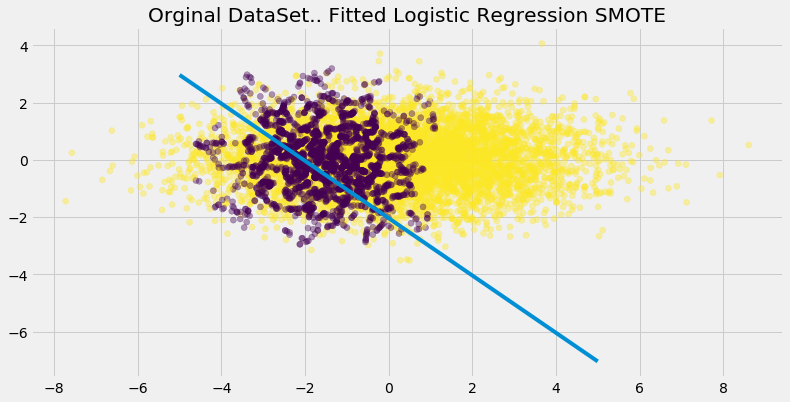

In [112]:
plt.scatter(X_train_res[:,0], X_train_res[:, 1], c = y_train_res[:]=='L', alpha=0.4)
plt.plot(x1, x2)
plt.title('Orginal DataSet.. Fitted Logistic Regression SMOTE')

## Combinations

<b>SMOTE + Tomek Link Removal:</b>
> Over sampling SMOTE followed by under sampling using Tomek Link removal

<b>SMOTE + ENN:</b>
> Over sampling SMOTE followed by under sampling using ENN


### SMOTE + Tomek Link Removal

In [119]:
os_us = SMOTETomek(ratio = 0.5, random_state = 1, k = 5)
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)
print("Distribution of class labels before resampling {}".format(Counter(y_train)))
print("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({'L': 6321, 'S': 679})
Distribution of class labels after resampling Counter({'L': 5887, 'S': 2726})


C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\imblearn\utils\deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\imblearn\utils\deprecation.py:50: DeprecationWarning: 'm' is deprecated from 0.2 and will be removed in 0.4. Use 'm_neighbors' instead.
  category=DeprecationWarning)


In [120]:
clf_base = LogisticRegression()
grid = {'C':10.0 * np.arange(1,3),
        'penalty':['l1', 'l2']}
cv = KFold(X_train.shape[0], n_folds=5, shuffle=True, random_state=0)
clf = GridSearchCV(clf_base, grid, cv = cv, n_jobs=8, scoring='f1_macro')
clf.fit(X_train_res, y_train_res)
coef = clf.best_estimator_.coef_
intercept = clf.best_estimator_.intercept_
x1 = np.linspace(-5, 5, 100)
x2 = -(coef[0][0]*x1+intercept[0])/coef[0][0]

In [121]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          L       0.91      0.84      0.87      2679
          S       0.17      0.27      0.21       321

avg / total       0.83      0.78      0.80      3000



Text(0.5,1,'Orginal DataSet.. Fitted Logistic Regression SMOTE and Tomek Link Removal')

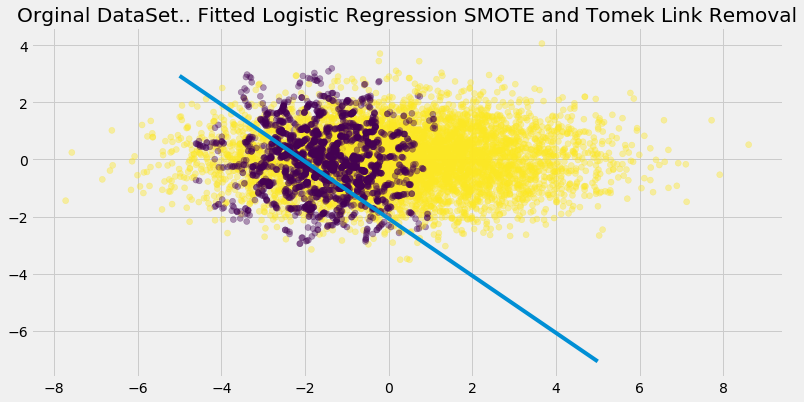

In [123]:
plt.scatter(X_train_res[:,0], X_train_res[:, 1], c = y_train_res[:]=='L', alpha=0.4)
plt.plot(x1, x2)
plt.title('Orginal DataSet.. Fitted Logistic Regression SMOTE and Tomek Link Removal')

### SMOTE + ENN

In [166]:
os_us = SMOTEENN(ratio = 0.5, random_state = 1)
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)
print("Distribution of class labels before resampling {}".format(Counter(y_train)))
print("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({'L': 6321, 'S': 679})
Distribution of class labels after resampling Counter({'L': 4361, 'S': 1560})


In [168]:
clf_base = LogisticRegression()
grid = {'C':10.0 * np.arange(1,3),
        'penalty':['l1', 'l2']}
cv = KFold(X_train.shape[0], n_folds=5, shuffle=True, random_state=0)
clf = GridSearchCV(clf_base, grid, cv = cv, n_jobs=4, scoring='f1_macro')
clf.fit(X_train_res, y_train_res=='L')
coef = clf.best_estimator_.coef_
intercept = clf.best_estimator_.intercept_
x1 = np.linspace(-5, 5, 100)
x2 = -(coef[0][0]*x1+intercept[0])/coef[0][0]

JoblibIndexError: JoblibIndexError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...esis\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\runpy.py in _run_code(code=<code object <module> at 0x0000025AA2231150, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\vikra\AppData\Local\Continuum\anaconda3...ges\__pycache__\ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\vikra\AppData\Local\Continuum\anaconda3...ramthesis\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...esis\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\v...is\\lib\\site-packages\\ipykernel\\kernelapp.py'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...esis\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000025AA2231150, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\vikra\AppData\Local\Continuum\anaconda3...ges\__pycache__\ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\vikra\AppData\Local\Continuum\anaconda3...ramthesis\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...esis\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\v...is\\lib\\site-packages\\ipykernel\\kernelapp.py'>, 'sys': <module 'sys' (built-in)>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    107         except (RuntimeError, AssertionError):
    108             old_loop = None
    109         try:
    110             self._setup_logging()
    111             asyncio.set_event_loop(self.asyncio_loop)
--> 112             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    113         finally:
    114             asyncio.set_event_loop(old_loop)
    115 
    116     def stop(self):

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    416             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    417                                    finalizer=self._asyncgen_finalizer_hook)
    418         try:
    419             events._set_running_loop(self)
    420             while True:
--> 421                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    422                 if self._stopping:
    423                     break
    424         finally:
    425             self._stopping = False

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1420                         logger.warning('Executing %s took %.3f seconds',
   1421                                        _format_handle(handle), dt)
   1422                 finally:
   1423                     self._current_handle = None
   1424             else:
-> 1425                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(428, 1)>>
   1426         handle = None  # Needed to break cycles when an exception occurs.
   1427 
   1428     def _set_coroutine_wrapper(self, enabled):
   1429         try:

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(428, 1)>)
    122             self._callback = None
    123             self._args = None
    124 
    125     def _run(self):
    126         try:
--> 127             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (428, 1)
    128         except Exception as exc:
    129             cb = _format_callback_source(self._callback, self._args)
    130             msg = 'Exception in callback {}'.format(cb)
    131             context = {

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=428, events=1)
     97             self.writers.remove(fd)
     98         del self.handlers[fd]
     99 
    100     def _handle_events(self, fd, events):
    101         fileobj, handler_func = self.handlers[fd]
--> 102         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    103 
    104     def start(self):
    105         try:
    106             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "clf_base = LogisticRegression()\ngrid = {'C':10.0...00)\nx2 = -(coef[0][0]*x1+intercept[0])/coef[0][0]", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 25, 22, 44, 10, 169395, tzinfo=tzutc()), 'msg_id': 'c813a42bebf443308fa508b0964da5ec', 'msg_type': 'execute_request', 'session': '7aeef791849947a98a52e95bd5e8fe2a', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c813a42bebf443308fa508b0964da5ec', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'7aeef791849947a98a52e95bd5e8fe2a']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "clf_base = LogisticRegression()\ngrid = {'C':10.0...00)\nx2 = -(coef[0][0]*x1+intercept[0])/coef[0][0]", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 25, 22, 44, 10, 169395, tzinfo=tzutc()), 'msg_id': 'c813a42bebf443308fa508b0964da5ec', 'msg_type': 'execute_request', 'session': '7aeef791849947a98a52e95bd5e8fe2a', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c813a42bebf443308fa508b0964da5ec', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'7aeef791849947a98a52e95bd5e8fe2a'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "clf_base = LogisticRegression()\ngrid = {'C':10.0...00)\nx2 = -(coef[0][0]*x1+intercept[0])/coef[0][0]", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 25, 22, 44, 10, 169395, tzinfo=tzutc()), 'msg_id': 'c813a42bebf443308fa508b0964da5ec', 'msg_type': 'execute_request', 'session': '7aeef791849947a98a52e95bd5e8fe2a', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c813a42bebf443308fa508b0964da5ec', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="clf_base = LogisticRegression()\ngrid = {'C':10.0...00)\nx2 = -(coef[0][0]*x1+intercept[0])/coef[0][0]", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "clf_base = LogisticRegression()\ngrid = {'C':10.0...00)\nx2 = -(coef[0][0]*x1+intercept[0])/coef[0][0]"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("clf_base = LogisticRegression()\ngrid = {'C':10.0...00)\nx2 = -(coef[0][0]*x1+intercept[0])/coef[0][0]",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("clf_base = LogisticRegression()\ngrid = {'C':10.0...00)\nx2 = -(coef[0][0]*x1+intercept[0])/coef[0][0]",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="clf_base = LogisticRegression()\ngrid = {'C':10.0...00)\nx2 = -(coef[0][0]*x1+intercept[0])/coef[0][0]", store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = "clf_base = LogisticRegression()\ngrid = {'C':10.0...00)\nx2 = -(coef[0][0]*x1+intercept[0])/coef[0][0]"
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="clf_base = LogisticRegression()\ngrid = {'C':10.0...00)\nx2 = -(coef[0][0]*x1+intercept[0])/coef[0][0]", store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>], cell_name='<ipython-input-168-bd6610168234>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 25aaf0ce5c0, executio...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x0000025AAF164810, file "<ipython-input-168-bd6610168234>", line 6>
        result = <ExecutionResult object at 25aaf0ce5c0, executio...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x0000025AAF164810, file "<ipython-input-168-bd6610168234>", line 6>, result=<ExecutionResult object at 25aaf0ce5c0, executio...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x0000025AAF164810, file "<ipython-input-168-bd6610168234>", line 6>
        self.user_global_ns = {'ALLOW_THREADS': 1, 'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'Annotation': <class 'matplotlib.text.Annotation'>, 'Arrow': <class 'matplotlib.patches.Arrow'>, 'Artist': <class 'matplotlib.artist.Artist'>, 'AutoLocator': <class 'matplotlib.ticker.AutoLocator'>, 'Axes': <class 'matplotlib.axes._axes.Axes'>, 'AxisError': <class 'numpy.core._internal.AxisError'>, 'BUFSIZE': 8192, 'BalanceCascade': <class 'imblearn.ensemble.balance_cascade.BalanceCascade'>, ...}
        self.user_ns = {'ALLOW_THREADS': 1, 'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'Annotation': <class 'matplotlib.text.Annotation'>, 'Arrow': <class 'matplotlib.patches.Arrow'>, 'Artist': <class 'matplotlib.artist.Artist'>, 'AutoLocator': <class 'matplotlib.ticker.AutoLocator'>, 'Axes': <class 'matplotlib.axes._axes.Axes'>, 'AxisError': <class 'numpy.core._internal.AxisError'>, 'BUFSIZE': 8192, 'BalanceCascade': <class 'imblearn.ensemble.balance_cascade.BalanceCascade'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
D:\machine_learning\handle_unbalanced_dataset\<ipython-input-168-bd6610168234> in <module>()
      1 clf_base = LogisticRegression()
      2 grid = {'C':10.0 * np.arange(1,3),
      3         'penalty':['l1', 'l2']}
      4 cv = KFold(X_train.shape[0], n_folds=5, shuffle=True, random_state=0)
      5 clf = GridSearchCV(clf_base, grid, cv = cv, n_jobs=4, scoring='f1_macro')
----> 6 clf.fit(X_train_res, y_train_res=='L')
      7 coef = clf.best_estimator_.coef_
      8 intercept = clf.best_estimator_.intercept_
      9 x1 = np.linspace(-5, 5, 100)
     10 x2 = -(coef[0][0]*x1+intercept[0])/coef[0][0]

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\sklearn\grid_search.py in fit(self=GridSearchCV(cv=sklearn.cross_validation.KFold(n...jobs', refit=True, scoring='f1_macro', verbose=0), X=array([[-0.59259456,  1.34980913],
       [ 1.68... 0.14239252],
       [-0.37024917,  0.52965495]]), y=array([ True,  True,  True, ..., False, False, False], dtype=bool))
    833         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    834             Target relative to X for classification or regression;
    835             None for unsupervised learning.
    836 
    837         """
--> 838         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method BaseSearchCV._fit of GridSearchCV(...obs', refit=True, scoring='f1_macro', verbose=0)>
        X = array([[-0.59259456,  1.34980913],
       [ 1.68... 0.14239252],
       [-0.37024917,  0.52965495]])
        y = array([ True,  True,  True, ..., False, False, False], dtype=bool)
        self.param_grid = {'C': array([ 10.,  20.]), 'penalty': ['l1', 'l2']}
    839 
    840 
    841 class RandomizedSearchCV(BaseSearchCV):
    842     """Randomized search on hyper parameters.

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\sklearn\grid_search.py in _fit(self=GridSearchCV(cv=sklearn.cross_validation.KFold(n...jobs', refit=True, scoring='f1_macro', verbose=0), X=array([[-0.59259456,  1.34980913],
       [ 1.68... 0.14239252],
       [-0.37024917,  0.52965495]]), y=array([ True,  True,  True, ..., False, False, False], dtype=bool), parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    569         )(
    570             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    571                                     train, test, self.verbose, parameters,
    572                                     self.fit_params, return_parameters=True,
    573                                     error_score=self.error_score)
--> 574                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    575                 for train, test in cv)
    576 
    577         # Out is a list of triplet: score, estimator, n_test_samples
    578         n_fits = len(out)

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object BaseSearchCV._fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
IndexError                                         Mon Jun 25 18:44:10 2018
PID: 3728Python 3.5.5: C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\python.exe
...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (LogisticRegression(C=10.0, class_weight=None, du...ol=0.0001,
          verbose=0, warm_start=False), array([[-0.59259456,  1.34980913],
       [ 1.68... 0.14239252],
       [-0.37024917,  0.52965495]]), array([ True,  True,  True, ..., False, False, False], dtype=bool), make_scorer(f1_score, average=macro, pos_label=None), array([   0,    2,    3, ..., 6995, 6997, 6999]), array([   1,    6,    8, ..., 6991, 6996, 6998]), 0, {'C': 10.0, 'penalty': 'l1'}, {}), {'error_score': 'raise', 'return_parameters': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (LogisticRegression(C=10.0, class_weight=None, du...ol=0.0001,
          verbose=0, warm_start=False), array([[-0.59259456,  1.34980913],
       [ 1.68... 0.14239252],
       [-0.37024917,  0.52965495]]), array([ True,  True,  True, ..., False, False, False], dtype=bool), make_scorer(f1_score, average=macro, pos_label=None), array([   0,    2,    3, ..., 6995, 6997, 6999]), array([   1,    6,    8, ..., 6991, 6996, 6998]), 0, {'C': 10.0, 'penalty': 'l1'}, {})
        kwargs = {'error_score': 'raise', 'return_parameters': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\sklearn\cross_validation.py in _fit_and_score(estimator=LogisticRegression(C=10.0, class_weight=None, du...ol=0.0001,
          verbose=0, warm_start=False), X=array([[-0.59259456,  1.34980913],
       [ 1.68... 0.14239252],
       [-0.37024917,  0.52965495]]), y=array([ True,  True,  True, ..., False, False, False], dtype=bool), scorer=make_scorer(f1_score, average=macro, pos_label=None), train=array([   0,    2,    3, ..., 6995, 6997, 6999]), test=array([   1,    6,    8, ..., 6991, 6996, 6998]), verbose=0, parameters={'C': 10.0, 'penalty': 'l1'}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1663     if parameters is not None:
   1664         estimator.set_params(**parameters)
   1665 
   1666     start_time = time.time()
   1667 
-> 1668     X_train, y_train = _safe_split(estimator, X, y, train)
        X_train = undefined
        y_train = undefined
        estimator = LogisticRegression(C=10.0, class_weight=None, du...ol=0.0001,
          verbose=0, warm_start=False)
        X = array([[-0.59259456,  1.34980913],
       [ 1.68... 0.14239252],
       [-0.37024917,  0.52965495]])
        y = array([ True,  True,  True, ..., False, False, False], dtype=bool)
        train = array([   0,    2,    3, ..., 6995, 6997, 6999])
   1669     X_test, y_test = _safe_split(estimator, X, y, test, train)
   1670 
   1671     try:
   1672         if y_train is None:

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\sklearn\cross_validation.py in _safe_split(estimator=LogisticRegression(C=10.0, class_weight=None, du...ol=0.0001,
          verbose=0, warm_start=False), X=array([[-0.59259456,  1.34980913],
       [ 1.68... 0.14239252],
       [-0.37024917,  0.52965495]]), y=array([ True,  True,  True, ..., False, False, False], dtype=bool), indices=array([   0,    2,    3, ..., 6995, 6997, 6999]), train_indices=None)
   1731             if train_indices is None:
   1732                 X_subset = X[np.ix_(indices, indices)]
   1733             else:
   1734                 X_subset = X[np.ix_(indices, train_indices)]
   1735         else:
-> 1736             X_subset = safe_indexing(X, indices)
        X_subset = undefined
        X = array([[-0.59259456,  1.34980913],
       [ 1.68... 0.14239252],
       [-0.37024917,  0.52965495]])
        indices = array([   0,    2,    3, ..., 6995, 6997, 6999])
   1737 
   1738     if y is not None:
   1739         y_subset = safe_indexing(y, indices)
   1740     else:

...........................................................................
C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\sklearn\utils\__init__.py in safe_indexing(X=array([[-0.59259456,  1.34980913],
       [ 1.68... 0.14239252],
       [-0.37024917,  0.52965495]]), indices=array([   0,    2,    3, ..., 6995, 6997, 6999]))
    155             return X.copy().iloc[indices]
    156     elif hasattr(X, "shape"):
    157         if hasattr(X, 'take') and (hasattr(indices, 'dtype') and
    158                                    indices.dtype.kind == 'i'):
    159             # This is often substantially faster than X[indices]
--> 160             return X.take(indices, axis=0)
        X.take = <built-in method take of numpy.ndarray object>
        indices = array([   0,    2,    3, ..., 6995, 6997, 6999])
    161         else:
    162             return X[indices]
    163     else:
    164         return [X[idx] for idx in indices]

IndexError: index 5922 is out of bounds for size 5921
___________________________________________________________________________

### Easy Ensemble

```
Sample subset size(L) == size(S)
Train AdaBoost on subset of L
repeat N times to get N classfiers
output a meta ensemble
```

In [144]:
ens = EasyEnsemble()
X_train_res, y_train_res = ens.fit_sample(X_train, y_train)
y_pred_proba = np.zeros(len(y_test))
for idx in range(len(y_train_res)):
    clf_base = AdaBoostClassifier()
    grid = {'n_estimators' : [10, 50, 100]}
    cv = KFold(X_train_res.shape[0], n_folds=5, shuffle=True, random_state=0)
    clf = GridSearchCV(clf_base, grid, cv = cv, n_jobs=8, scoring='f1_macro')
    clf.fit(X_train_res[idx], y_train_res[idx])
    y_pred_proba += list(zip(*clf.predict_proba(X_test)))[0]
y_pred_proba = y_pred_proba / len(y_train_res)
y_pred = (y_pred_proba > 0.5).astype(int)
y_pred = y_pred.astype('str')
y_pred[y_pred == '1'] = 'L'
y_pred[y_pred == '0'] = 'S'

In [148]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          L       0.98      0.60      0.74      2679
          S       0.21      0.87      0.34       321

avg / total       0.89      0.63      0.70      3000



### BalanceCascade (There is some issue with below implementation)

```
. sample a subset L(i) of L such that size(L(i)) == Size(S)
. Learn an adaBoost Ensemble using L(i) and S
. Remove all examples from L that are correctly classified by above classifier
. Repeat for N iterations and combine
```

In [160]:
# Note this is not a true implementation of Balancecascade since the library does not
# return the fitted classfiers used in generating the subsets

ens = BalanceCascade(classifier='adaboost', random_state = 1)
X_train_res, y_train_res = ens.fit_sample(X_train, y_train == 'L')
y_pred_proba = np.zeros(len(y_test))
for idx in range(len(y_train_res)):
    clf_base = AdaBoostClassifier()
    grid = {'n_estimators' : [10, 50, 100]}
    cv = KFold(X_train_res.shape[0], n_folds=5, shuffle=True, random_state=0)
    clf = GridSearchCV(clf_base, grid, cv = cv, n_jobs=8, scoring='f1_macro')
    clf.fit(X_train_res[idx], y_train_res[idx])
    y_pred_proba += list(zip(*clf.predict_proba(X_test)))[0]
y_pred_proba = y_pred_proba / len(y_train_res)
y_pred = (y_pred_proba > 0.5).astype(int)
y_pred = y_pred.astype('str')
y_pred[y_pred == '1'] = 'L'
y_pred[y_pred == '0'] = 'S'

In [165]:
print(classification_report(y_test=='L', clf.predict(X_test)))

             precision    recall  f1-score   support

      False       0.13      0.33      0.19       321
       True       0.90      0.74      0.81      2679

avg / total       0.82      0.70      0.75      3000



### Epilogue

1.  No Free Lunch
2. Different methods work well for different data distributions, classifiers and objectives
3. Other techniques: Borderline SMOTE, SMOTEBoost, ADA-SYN, CBO, AdaC1, AdaC2, AdaC3, Kernel Based methods, Active learning
4. with in class vs between class imbalance